## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [3]:
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2','Col3','day'],
                ['Peter',1,2,3,'monday'],
                ['Janne',4,5,6,'tuesday'],
                ['Lars',7,8,9,'wednesday'],
                ['Mia',10,11,12,'thursday'],
                ['Ole',13,14,15,'friday'],
                ['Tina',16,17,18,'saturday'],
                ['Bo',19,20,21,'sunday']])
#          data=data[rows, cols]      
df = pd.DataFrame(data=data[1:8,1:5], columns=data[0,1:5], index=data[1:8,0])
df

,Col1,Col2,Col3,day
Peter,1,2,3,monday
Janne,4,5,6,tuesday
Lars,7,8,9,wednesday
Mia,10,11,12,thursday
Ole,13,14,15,friday
Tina,16,17,18,saturday
Bo,19,20,21,sunday


In [36]:
df['Col2']

Peter     2
Janne     5
Lars      8
Mia      11
Ole      14
Tina     17
Bo       20
Name: Col2, dtype: object

In [27]:
df.iloc[:,2]

Peter     3
Janne     6
Lars      9
Mia      12
Ole      15
Tina     18
Bo       21
Name: Col3, dtype: object

In [33]:
# Remember iloc is not including headers. But still starts from 0
df.iloc[2,1]

'8'

## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

In [37]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Date': 'Tue, 20 Sep 2022 11:38:31 GMT', 'Content-Type': 'application/zip', 'Content-Length': '46603', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=7c2b11fa018cc2a991aa7ed18f9a292a; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Tue, 20 Sep 2022 11:38:32 GMT', 'Last-Modified': 'Tue, 20 Sep 2022 11:38:31 GMT', 'Content-Disposition': 'attachment; filename=API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4499137.zip', 'Request-Context': 'appId=cid-v1:da002513-bd8b-4441-9f30-737944134422'}


In [38]:
# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]
fname = 'data/'+fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))
# Now it we need to unzip it

-----------------
Downloaded data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4499137.zip


In [39]:
%%bash
ls data/API*.zip

data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4499137.zip


In [40]:
import zipfile
# extract content of zip file in current folder
zipfile.ZipFile(fname, 'r').extractall('./data')

In [4]:
data = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4499137.csv', skiprows=4)
columns_names = data.columns
print('column names:\n',list(columns_names),'\n\n')
countries = data['Country Name']
print('{} countries are in the dataset.'.format(len(countries)),'\n')
print('countries are of data type: ',type(countries),'\n')
print(list(countries))
data[50:60]

column names:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'Unnamed: 66'] 


266 countries are in the dataset. 

countries are of data type:  <class 'pandas.core.series.Series'> 

['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
50,Cuba,CUB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,28870.000839,26690.000534,29209.999084,27170.000076,26239.999771,26709.999084,25909.999847,NaN,NaN,NaN
51,Curacao,CUW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Cayman Islands,CYM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Cyprus,CYP,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,6429.999828,6809.999943,6849.999905,7219.999790,7360.000134,7199.999809,7190.000057,NaN,NaN,NaN
54,Czech Republic,CZE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,101150.001526,97510.002136,99139.999390,101730.003357,101830.001831,100900.001526,96290.000916,NaN,NaN,NaN
55,Germany,DEU,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,776150.024414,736010.009766,742309.997559,747150.024414,732200.012207,707700.012207,657400.024414,NaN,NaN,NaN
56,Djibouti,DJI,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,560.000002,400.000006,460.000008,419.999987,419.999987,400.000006,419.999987,NaN,NaN,NaN
57,Dominica,DMA,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,170.000002,180.000007,180.000007,180.000007,170.000002,170.000002,170.000002,NaN,NaN,NaN
58,Denmark,DNK,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,39959.999084,35819.999695,33700.000763,35319.999695,33130.001068,33130.001068,29700.000763,NaN,NaN,NaN
59,Dominican Republic,DOM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,21290.000916,21450.000763,23590.000153,24590.000153,23549.999237,25309.999466,27229.999542,NaN,NaN,NaN


In [5]:
print(type(data))
numbers = data.loc[1:,'2014']
print(numbers)
print(type(numbers))



<class 'pandas.core.frame.DataFrame'>
1      587699.992426
2        4880.000114
3      201680.001885
4       29629.999161
5        4820.000172
           ...      
261              NaN
262     27430.000305
263    447929.992676
264      4690.000057
265     12079.999924
Name: 2014, Length: 265, dtype: float64
<class 'pandas.core.series.Series'>


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format) 



y2014 = data.loc[1:,['Country Name','2014']].sort_values('2014', ascending=False)
print(type(y2014))
y2014[11:21]

<class 'pandas.core.frame.DataFrame'>


,Country Name,2014
230,East Asia & Pacific (IDA & IBRD countries),11322329.90
198,Post-demographic dividend,11224420.12
40,China,10006669.92
62,Early-demographic dividend,6795368.66
65,Europe & Central Asia,6119067.97
170,North America,5670769.17
251,United States,5107209.96
139,Lower middle income,4949211.39
231,Europe & Central Asia (IDA & IBRD countries),3197750.93
73,European Union,2836770.03


## Remove if you can those rows that are not countries (regions and aggregated groups) (hint: ISO 3166, Alpha-3 country codes, a csv file can be found here: /data/country_codes.csv)

In [7]:
cc = pd.read_csv('../data/country_codes.csv', sep='\t', header=None, index_col=0, skipinitialspace = True)
cc_values = cc.iloc[:,1].str.strip() # Remove white space after eachh country code
cc_list = cc_values.values.tolist() # Convert to list so we can compare it to our data
cc_list[:5]

['AFG', 'ALB', 'DZA', 'ASM', 'AND']

In [9]:
data = data[data['Country Code'].isin(cc_list)]
years = [str(year) for year in range(2005,2020)]
mask = ['Country Name', 'Country Code'] + years
newData = data[mask].sort_values(mask[-6], ascending=False) ## OBS its sorted by -6 which is year 2014!

co2data = newData.set_index('Country Name').iloc[:10]
co2data



,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,
China,CHN,5824629.88,6437470.21,6993180.18,7199600.10,7719069.82,8474919.92,9282549.80,9541870.12,9984570.31,10006669.92,9861099.61,9874660.16,10096009.77,10502929.69,10707219.73
United States,USA,5753490.23,5653080.08,5736319.82,5558379.88,5156430.18,5392109.86,5173600.10,4956060.06,5092100.10,5107209.96,4990709.96,4894500.00,4819370.12,4975310.06,4817720.21
India,IND,1136469.97,1215209.96,1336739.99,1424380.00,1564880.00,1659979.98,1756739.99,1909439.94,1972430.05,2147110.11,2158020.02,2195250.00,2320409.91,2451929.93,2456300.05
Russian Federation,RUS,1611979.98,1654849.98,1658150.02,1655189.94,1546670.04,1617829.96,1699089.97,1675760.01,1632680.05,1611959.96,1592560.06,1571520.02,1594550.05,1661000.00,1703589.97
Japan,JPN,1212819.95,1189520.02,1225069.95,1158219.97,1100979.98,1156479.98,1213520.02,1253609.99,1262780.03,1217120.00,1179439.94,1167790.04,1155229.98,1116150.02,1081569.95
Germany,DEU,802380.00,814409.97,783799.99,789690.00,734810.00,773070.01,746479.98,760130.00,776150.02,736010.01,742310.00,747150.02,732200.01,707700.01,657400.02
"Iran, Islamic Rep.",IRN,450790.01,484179.99,514140.01,523049.99,542289.98,541169.98,552049.99,559120.00,583700.01,605349.98,599179.99,607210.02,626419.98,637429.99,630010.01
"Korea, Rep.",KOR,481000.00,487850.01,503690.00,514919.98,526640.01,575219.97,598479.98,600320.01,599599.98,588090.03,607830.02,615880.00,626630.00,630640.01,610789.98
Canada,CAN,549030.03,540530.03,571630.00,550469.97,521320.01,537010.01,549289.98,546210.02,555659.97,561679.99,558700.01,556830.02,568080.02,580090.03,580210.02


## Plot the emissions of China and USA over time respectively

In [10]:
ts_chn = co2data.loc[co2data['Country Code']=='CHN'].iloc[0][1:]
ts_usa = co2data.loc[co2data['Country Code']=='USA'].iloc[0][1:]
print(ts_chn)
print(ts_usa)

2005    5824629.88
2006    6437470.21
2007    6993180.18
2008    7199600.10
2009    7719069.82
2010    8474919.92
2011    9282549.80
2012    9541870.12
2013    9984570.31
2014   10006669.92
2015    9861099.61
2016    9874660.16
2017   10096009.77
2018   10502929.69
2019   10707219.73
Name: China, dtype: object
2005   5753490.23
2006   5653080.08
2007   5736319.82
2008   5558379.88
2009   5156430.18
2010   5392109.86
2011   5173600.10
2012   4956060.06
2013   5092100.10
2014   5107209.96
2015   4990709.96
2016   4894500.00
2017   4819370.12
2018   4975310.06
2019   4817720.21
Name: United States, dtype: object


            CHN        USA
2005 5824629.88 5753490.23
2006 6437470.21 5653080.08
2007 6993180.18 5736319.82
2008 7199600.10 5558379.88


<AxesSubplot:title={'center':'CO2 Emission'}, xlabel='Year', ylabel='Emission'>

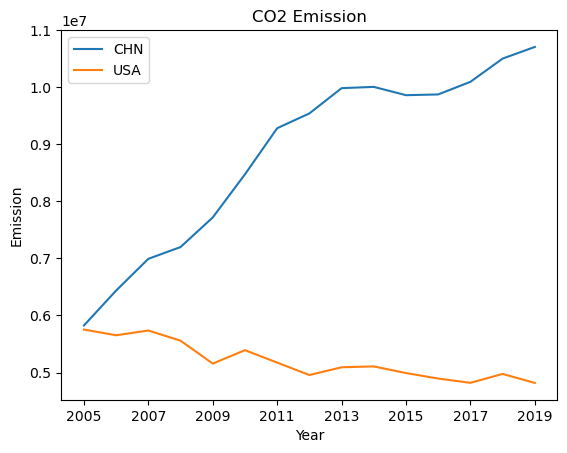

In [265]:
# CONCAT
ts = pd.concat([ts_chn, ts_usa], axis=1, keys=['CHN', 'USA']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis
print(ts[:4])


ts.plot(title='CO2 Emission', xlabel='Year', ylabel='Emission')

In [1]:
ts

NameError: name 'ts' is not defined